<a href="https://colab.research.google.com/github/thiagolermen/ml-course/blob/main/src/2-multivariate-linear-regression/MultivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Linear Regression

We're gonna predict the price that a house will sell for. The difference this time around is we have more than one dependent variable. We're given both the size of the house in square feet, and the number of bedrooms in the house

## Imports

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [28]:
path = 'https://raw.githubusercontent.com/thiagolermen/ml-course/main/data/ex1data2.txt?token=AL353PBOIXU364U56BAPW6TAXPWLS'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Data normalization

In [29]:
data = (data - data.mean())/data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [30]:
# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [31]:
print(f" X.shape: {X.shape} \n y.shape: {y.shape} \n theta.shape {theta.shape}")

 X.shape: (47, 3) 
 y.shape: (47, 1) 
 theta.shape (1, 3)


## Cost function

Hypothesis

$h_{\theta}(x) =    \begin{bmatrix}
                        \theta_0 & \theta_1 & \theta_2 & ... & \theta_n \\
                    \end{bmatrix}
                    \begin{bmatrix}
                        x_0  \\[0.3em]
                        x_1  \\[0.3em]
                        x_2  \\[0.3em]
                        ...  \\[0.3em]
                        x_n  \\[0.3em]
                    \end{bmatrix}
                    = \theta^Tx
$    

Cost function

$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$

In [32]:
def loss(X, y, theta):
    squared_error = np.power(((X * theta.T) - y), 2)
    return np.sum(squared_error) / (2 * len(X))

In [33]:
loss(X,y,theta)

0.48936170212765967

## Gradient descent


In [34]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    n_parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(n_parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = loss(X, y, theta)
        
    return theta, cost

## Train

In [36]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
new_theta, cost = gradientDescent(X, y, theta, alpha, iters)
print(f" New theta: {new_theta} \n Final cost: {loss(X, y, new_theta)}")

 New theta: [[-1.10797896e-16  8.78503652e-01 -4.69166570e-02]] 
 Final cost: 0.13070336960771892


## Test

Text(0.5, 1.0, 'Error vs. Training Epoch')

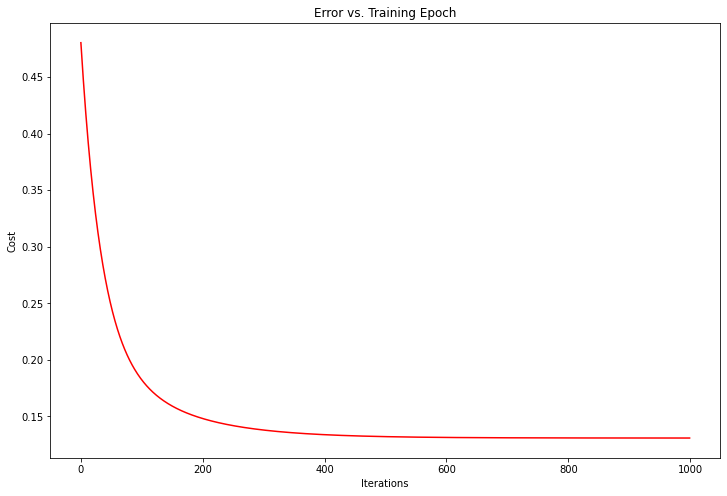

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')